<a href="https://colab.research.google.com/github/Anirudh-2712/Exploratory-Data-analysis/blob/main/module6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Data Analysis (module 6)

### Anirudh Agrawal
### 22BCE2191
### C2 slot


##  Dimensionality Reduction


importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis, TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

Load crimes.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv')
print(df.head())
print(df.dtypes)

   rownames  county  year    crmrte    prbarr   prbconv   prbpris  avgsen  \
0         1       1    81  0.039885  0.289696  0.402062  0.472222    5.61   
1         2       1    82  0.038345  0.338111  0.433005  0.506993    5.59   
2         3       1    83  0.030305  0.330449  0.525703  0.479705    5.80   
3         4       1    84  0.034726  0.362525  0.604706  0.520104    6.89   
4         5       1    85  0.036573  0.325395  0.578723  0.497059    6.55   

      polpc   density  ...     lwfir     lwser     lwmfg     lwfed     lwsta  \
0  0.001787  2.307159  ...  5.607452  5.374044  5.434246  6.014619  5.464848   
1  0.001767  2.330254  ...  5.706707  5.444911  5.482013  6.039540  5.536862   
2  0.001836  2.341801  ...  5.736475  5.481292  5.597310  6.084157  5.522900   
3  0.001886  2.346420  ...  5.858180  5.531204  5.640985  6.129421  5.568077   
4  0.001924  2.364896  ...  5.948220  5.564850  5.700042  6.195282  5.639919   

      lwloc  lpctymle   lpctmin    ltaxpc      lmix  
0 

In [3]:
numeric_df = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)

def plot_explained_variance(explained_variance, title):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(title)
    plt.grid()
    plt.show()


### Principal Component Analysis (PCA)

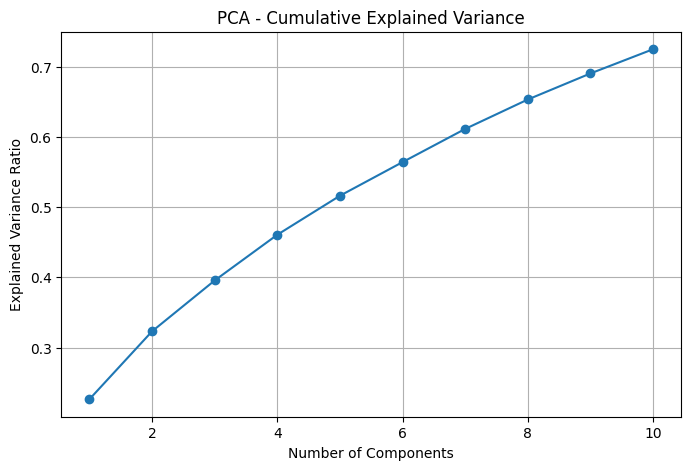

In [4]:
pca = PCA(n_components=10)  # Try reducing to 10 dimensions
pca_components = pca.fit_transform(data_scaled)
plot_explained_variance(pca.explained_variance_ratio_.cumsum(), 'PCA - Cumulative Explained Variance')


### Factor Analysis

In [5]:
fa = FactorAnalysis(n_components=5, random_state=0)  # Using 5 factors for example
fa_components = fa.fit_transform(data_scaled)
print("\nFactor Analysis components (first 5 samples):")
print(fa_components[:5])


Factor Analysis components (first 5 samples):
[[-0.23488625 -0.90462921 -0.25662856  0.59009785 -0.1961925 ]
 [-0.07066457 -0.92382782 -0.28944798  0.40516709 -0.15366543]
 [ 0.24957778 -0.89806914 -0.41750458 -0.16591432 -0.02402143]
 [ 0.63067826 -0.79713586 -0.38287775 -0.08835468  0.02687165]
 [ 1.20835004 -0.64223798 -0.40330624 -0.20095006  0.06444727]]


### Singular Value Decomposition (SVD)

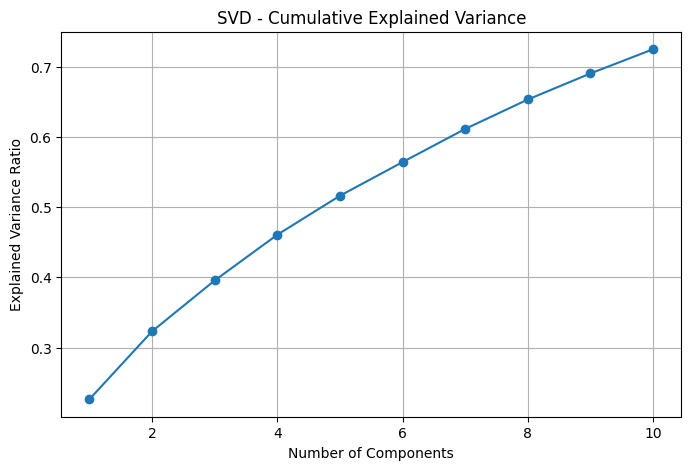

In [6]:
svd = TruncatedSVD(n_components=10)
svd_components = svd.fit_transform(data_scaled)
plot_explained_variance(svd.explained_variance_ratio_.cumsum(), 'SVD - Cumulative Explained Variance')


### Non-linear method: Isomap for Manifold Learning

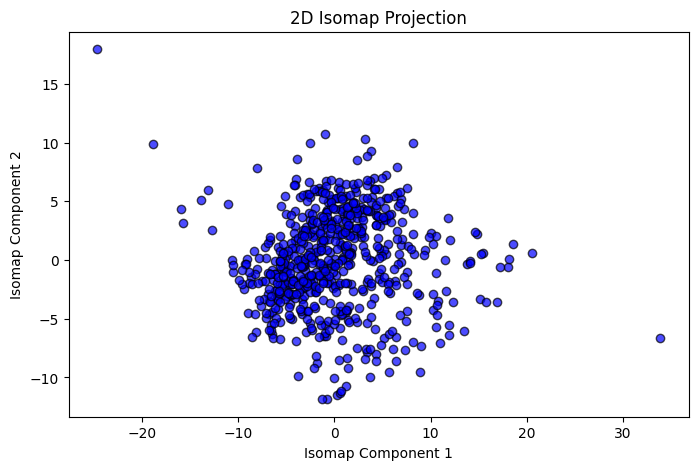

In [8]:
isomap = Isomap(n_components=2, n_neighbors=10)
isomap_components = isomap.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(isomap_components[:, 0], isomap_components[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('2D Isomap Projection')
plt.show()